In [14]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# 의사결정나무(Decision Tree)

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
#install.packages("caret")

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'tzdb', 'prodlim', 'timechange', 'proxy', 'iterators', 'Rcpp', 'data.table', 'clock', 'gower', 'hardhat', 'ipred', 'lubridate', 'tidyr', 'timeDate', 'e1071', 'foreach', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'





The downloaded binary packages are in
	/var/folders/ws/19pvrmj569x7h95xb240729r0000gn/T//RtmpO59kF6/downloaded_packages


In [17]:
library(caret)

In [7]:
# 학습용 검증용 분류
set.seed(1234)
samp <- createDataPartition(iris$Species, p = 0.7, list = F) # species에서 70퍼가져오고 리스트형태가 아닌 벡터로


In [8]:
#학습용
data.tr <-iris[samp,]
#검증용
data.test <- iris[-samp,]

In [9]:
nrow(data.tr)
nrow(data.test)

[1] 105

[1] 45

In [10]:
# 문제 및 정답 만들기
x <-subset(data.test, select=-Species)
y <- data.test$Species

In [12]:
nrow(x)
length(y)  #벡터라서 그럼

[1] 45

[1] 45

In [20]:
install.packages('rpart')


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/ws/19pvrmj569x7h95xb240729r0000gn/T//RtmpO59kF6/downloaded_packages


In [22]:
# 학습시키기
library(rpart)
iris_tree <- rpart( Species~.,data=data.tr) #.은 data.tr에서 Species를 제외한 전부
iris_tree

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.35 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.35 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.65 38  3 versicolor (0.00000000 0.92105263 0.07894737) *
    7) Petal.Width>=1.65 32  0 virginica (0.00000000 0.00000000 1.00000000) *

In [25]:
# 검증하기
pred <- predict(iris_tree, newdata = x,type = 'class')
pred

1          7         10         11         13         17         18 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        19         23         25         27         33         36         43 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
        45         51         54         55         57         61         64 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
        70         71         74         77         78         81         83 
versicolor  virginica versicolor versicolor  virginica versicolor versicolor 
        84         94        105        114        115        118        123 
versicolor versicolor  virginica  virginica  virginica  virginica  virginica 
       125        134        138        140        142        143        145 
 virginica versicolor  virginica  virginica  virginica  virginica  virginica 
       148        149        150 
 virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [27]:
#예측력
mean(pred==y)

[1] 0.9333333

In [28]:
#정오표
table(pred,y) ##앱에서 쓰려면  iris_tree를 불러야함.

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

### 시각화를 위해  rpart.plot package를 설치

In [29]:
install.packages('rpart.plot')


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/ws/19pvrmj569x7h95xb240729r0000gn/T//RtmpO59kF6/downloaded_packages


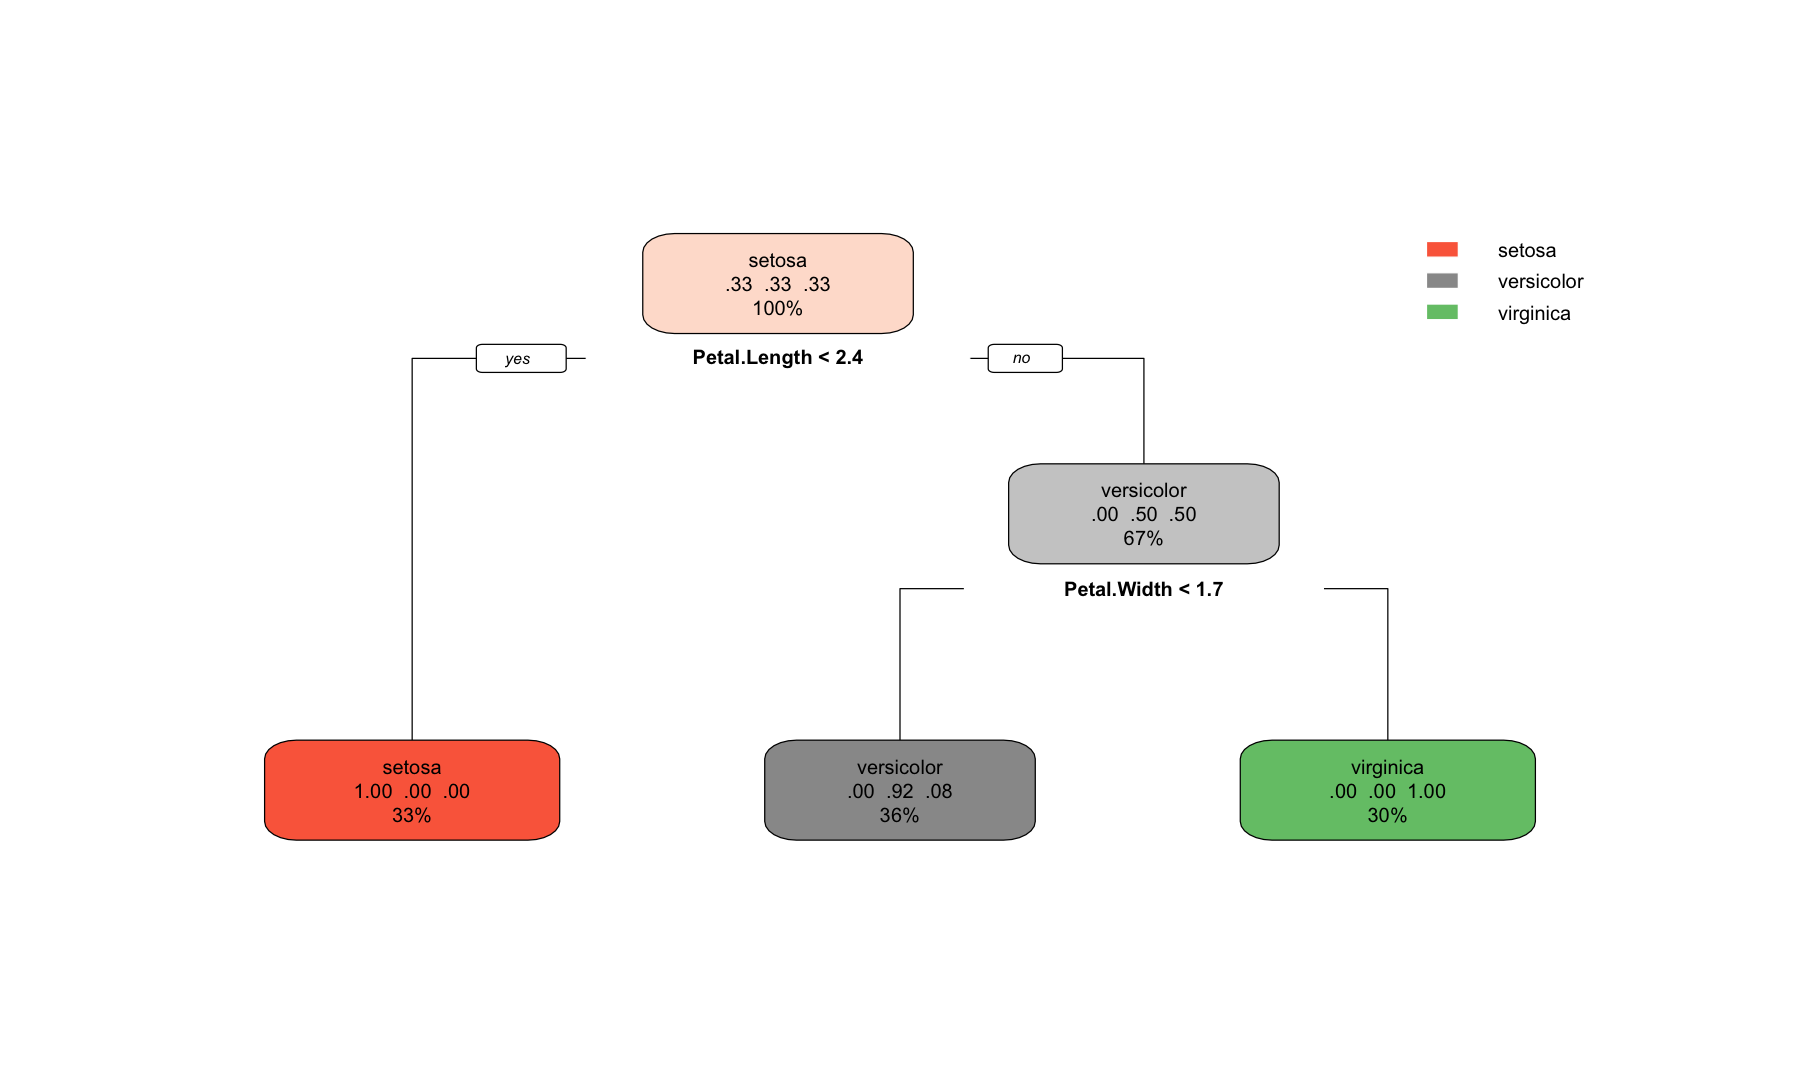

In [31]:
library(rpart.plot)
par(bg='white')
rpart.plot(iris_tree)